# Домашнее задание 1

Это домашнее задание по материалам 1-3 недели семестра. Дедлайн по отправке - __23:59 17 марта__.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __ИАД_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __ИАД_2__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Максимальный балл за задание - 140. Для получения полного балла за домашнее задание необходимо набрать 100 баллов.

Желаем успехов!

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
где $\ell$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$, $\lambda > 0$ - параметр регуляризации.

Используем линейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Полученная задача называется задачей логистической регрессии.

__Задача 1. (всего 20 баллов)__ Проведем подготовительную работу.

__а). (15 баллов)__ Покажите, что градиент и гессиан целевой функции можно записать в виде:
$$
\nabla f(w) = \frac{1}{n} \sum_{i=1}^n \frac{-y_i}{1 + \exp(y_i w^Tx_i)}x_i + \lambda w,
\quad
\nabla^2 f(w) = \frac{1}{n} \sum_{i=1}^n \frac{\exp(y_i w^Tx_i)}{(1 + \exp(y_i w^Tx_i))^2} x_i x_i^T + \lambda I.
$$

Докажите, что решаемая задача является $\mu$-сильно выпуклой и имеет $L$-Липшицев градиент с $\mu = \lambda$ и $L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$.

* $\nabla f(w) = \frac{1}{n}\sum\limits_{i=1}^n \nabla \log (1 + e^{-y_iw^Tx_i}) + \frac{\lambda}{2} \nabla ||w||^2 = \frac{1}{n}\sum\limits_{i=1}^n \frac{-y_ix_i e^{-y_iw^Tx_i}}{ 1 + e^{-y_iw^Tx_i}} + \lambda w $

* $\frac{\partial f(w)}{\partial w_k} = \frac{1}{n}\sum\limits_{i=1}^n \frac{-y_ix_i^k e^{-y_iw^Tx_i}}{ 1 + e^{-y_iw^Tx_i}} + \lambda w_k$

* $\frac{\partial^2 f(w)}{\partial w_k w_j} = \lambda \delta_{k,j} + \frac{1}{n}\sum\limits_{i=1}^m \frac{(-y_ix_i^j)(-y_ix_i^k) e^{-y_iw^Tx_i}}{ 1 + e^{-y_iw^Tx_i}} - \frac{(-y_ix_i^j)(-y_ix_i^k) e^{-2y_iw^Tx_i}}{ (1 + e^{-y_iw^Tx_i})^2}  $

* $\frac{\partial^2 f(w)}{\partial w_k w_j} = \lambda \delta_{k,j} + \frac{1}{n}\sum\limits_{i=1}^m x_i^jx_i^k e^{-y_iw^Tx_i}\frac{1}{(1+e^{-y_iw^Tx_i})^2}$

* $(x_ix_i^T)_{j,k} = x_i^jx_i^k$

* $\nabla^2f(w) = \lambda I + \frac{1}{n}\sum\limits \frac{e^{-y_iw^Tx_i}}{(1+e^{-y_iw^Tx_i})^2} x_ix_i^T$

* $D = diag(\frac{e^{-y_iw^Tx_i}}{(1+e^{-y_iw^Tx_i})^2})$

*  $\nabla^2 f(w) = \frac{1}{n}X^TDX + \lambda I = U (\frac{1}{n}\Sigma^2D + \lambda I)U^T $ -- применили SVD разложение к $X^TX$

* $\mu = \min \lambda(\nabla^2 f(w)) , L  = \max \lambda(\nabla^2 f(w))$

* Так как $X^TX$ может быть вырожденной, то  $ \min \lambda(\nabla^2 f(w)) = \lambda $

* $\max \lambda(\nabla^2 f(w)) = \lambda + \max \frac{1}{4n}\Sigma_i^2$ , так как  $D_{i,i}=\sigma(-y_iw^Tx_i)(1 - \sigma(-y_iw^Tx_i)) \le \frac{1}{4}$ и достигается равенство $= \frac{1}{4}$ при $w^Tx_i = 0$

* Мы знаем , что максимальное собственное число матрицы $X^TX$ -- есть спектральная норма матрицы $X$, но спектральная норма матрицы меньше нормы фробениуса.

* $\max \lambda(\nabla^2 f(w)) \le \lambda + \frac{1}{4n}\sum\limits_{i=1}^n||x_i||^2$, но если у $X^TX$  единственное собственное число не равно нулю, то норма фробениуса и спектральная совпадают. Добавим к этому $w^Tx_i = 0 \quad \forall i$ , то все неравенства выше превратятся в равенства. Пример такого датасета: Вся выборка заполнена одним и тем же вектором $x$ , который перпендикулярен весам $w$.  

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$, в которой и будет храниться выборка $\{x_i, y_i\}_{i=1}^n$:

In [1]:
dataset = "mushrooms.txt"
#файл должен лежать в той же деректории, что и notebook

In [3]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Поменяем вектор $y$, чтобы $y_i$ принимали значения $-1$ и $1$. Вы также можете сделать дополнительную предобработку данных (приемами из машинного обучения), но это никак дополнительно не оценивается.

In [4]:
y = 2 * y - 3

Разделим данные на две части: обучающую и тестовую.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__б). (5 балла)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$. Задайте $\lambda$ так, чтобы $\lambda \approx L / 1000$.  Реализуйте в коде подсчет значения, градиента и гессиана для нашей целевой функции ($X$, $y$, $\lambda$ лучше подавать в качестве параметра, чтобы была возможность их менять, а не только подставлять фиксированные $X_{train}$, $y_{train}$). Можно использовать как библиотеку ``numpy``, так и более специализированными библиотеки, с которыми знакомы, например, ``autograd``, ``pytorch``, ``jax``.

In [6]:
import numpy as np
#ваше решение (Code и Markdown)
value = np.sum(np.diag(X_train.T@X_train)) / 4 / X_train.shape[0]

In [7]:
value

5.25

In [8]:
# L = lambda + value ; lambda = 0.001L ; value = 0.999L --> lambda = 1/999*value
lambda_ = 1/999*value
L = lambda_ + value

In [12]:
# My realization
def func(w,X,y, lambda_):
    return np.mean(np.log(1+ np.exp(-y*(X@w)))) + lambda_/2*np.sum(w**2)
    exp_values = np.exp(-y*(X@w))
def grad(w, X, y, lambda_):
    exp_ = np.exp(-y*(X@w))
    return lambda_*w + np.mean( (-(X.T*y).T).T*(exp_/ (1+exp_)) , axis=1)

def gessian(w,X,y,lambda_) :
    exp_ = np.exp(-y*(X@w))
    d = exp_ / (1+exp_)**2
    I = np.diag(np.ones(X.shape[1]))
    return I*lambda_ + 1/X.shape[0]* X.T@np.diag(d)@X

w = np.random.normal(size=(112,))
print(grad(w,X_train,y_train, lambda_).shape  , gessian(w,X_train,y_train, lambda_).shape)
print(func(w,X_train,y_train, lambda_))

(112,) (112, 112)
2.0676850232576


__Задача 2. (всего 30 баллов)__ Данная часть задания связана с моментумом и ускорением.

__а). (10 баллов)__ Реализуйте метод тяжелого шарика и ускоренный градиентный метод Нестерова.

На всякий случай мы приводим здесь вариант описания функции для некоторого метода. Можно пользоваться таким форматом по желанию. Учтите, что в коде встречается ``x_sol`` - это проблему стоит как-то обойти или не использовать критерии, завязанные на ``x_sol``.

In [13]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time as ti

In [14]:
def plot(history_arr, curve_name_arr, title = 'Графики сходимости'  , times = None):
    plt.figure(figsize=(10,8))
    if times is not None:
        for i,history in enumerate(history_arr) :
            plt.loglog(times[i],history , label=curve_name_arr[i])
    else :
        for i,history in enumerate(history_arr) :
            plt.loglog(np.arange(len(history)),history , label=curve_name_arr[i])

    plt.xlabel('Итерации')
    plt.ylabel('Критерий')
    plt.legend()
    plt.title(title)
    plt.show()

def trainer(f, nabla_f, x_0,  optimizer , x_sol=None,
                     K = 10**3, eps = 10**-5, mode = '||nabla_f(x)|| / ||nabla_f(x_0)||' , time=False , all_points = False):
    error = None

    # За счет 3 переменных избавились от проблемы с первой итерацией: tau*(x_curr - x_last) = 0 --> будет обычный GD шаг в начале
    x_last = x_0  # x_k-1
    x_curr = x_0  # x_k
    x_new = x_0   # x_k+1

    if time :
        times = []

    if mode == 'x_k - x^*' :
        error = lambda x : np.sum((x - x_sol)**2)
        # print('Error mode: || x - x^*||')
    elif mode == 'f(x_k) - f(x^*)':
        f_sol = f(x_sol)
        error = lambda x : f(x) - f_sol
        # print('Error mode: f(x) - f(x^*)')
    elif mode == 'x_k+1 - x_k':
        error = lambda x: np.sum((x - x_last)**2)
        # print('Error mode: || x_k+1 - x_k||')
    elif mode == 'f(x_k+1) - f(x_k)':
        error = lambda x : f(x) - f(x_last)
        # print('Error mode: f(x_k+1) - f(x_k)')
    elif mode == '||nabla_f(x)|| / ||nabla_f(x_0)||':
        norm_nabla_0 = np.linalg.norm(nabla_f(x_0),ord=2)
        error = lambda x : np.linalg.norm(nabla_f(x), ord=2)  / norm_nabla_0
        # print('Error mode: ||nabla_f(x)||')
    assert error is not None

    if all_points :
        points = []

    error_history = []

    for j in tqdm(range(K)):

        x_new = optimizer.step(x_curr , x_last)
        x_last = x_curr
        x_curr = x_new
        # print(error(x_curr))
        error_history.append(error(x_curr))
        if all_points :
            points.append(x_curr)
        if time :
            times.append(ti.time())
        if eps is not None :
            if error_history[-1] < eps :
                return x_curr , error_history



    if all_points :
        x_curr = points
    if time :
        return x_curr , error_history , times
    else :
        return x_curr , error_history

In [15]:
class HeavyBall:
    def __init__(self,f , nabla_f , gamma, term = None ,tau=None) :
        self.iter = 0
        self.tau = tau
        self.gamma = gamma
        self.term = term
        self.func = f
        self.nabla = nabla_f
    def step(self , x , x_last) :
        self.iter += 1
        if self.tau is None :
            return x - self.gamma*self.nabla(x) + (self.iter/(self.iter + self.term))*(x - x_last)
        else :
            return x - self.gamma*self.nabla(x) + self.tau*(x - x_last)

In [16]:
class Nesterov:
    def __init__(self,f , nabla_f , gamma, term = None ,tau=None) :
        self.iter = 0
        self.tau = tau
        self.gamma = gamma
        self.term = term
        self.func = f
        self.nabla = nabla_f
    def step(self , x , x_last) :
        self.iter += 1
        if self.tau is None :
            next_x =  x + (self.iter/(self.iter + self.term))*(x - x_last)
            return next_x - self.gamma*self.nabla(next_x)
        else :
            next_x = x  + self.tau*(x - x_last)
            return next_x - self.gamma*self.nabla(next_x)

__б). (20 баллов)__ Решите задачу оптимизации на тестовой выборке с помощью двух реализованных методов. Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1 (5 хватит). Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если целевая функция является  сильно выпуклой, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Стартовую точку и критерий сходимости можете выбрать на свой вкус, мы советуем использовать нормированную версию критерия, например, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, а также использовать в Задачах 3-4 ту же самую стартовую точку и тот же самый критерий сходимости.

В данном пункте нужно построить три графика: 1) значения критерия сходимости от номера итерации для метода тяжелого шарика с различными значениями моментума, 2) значения критерия сходимости от номера итерации для ускоренного градиентного метода с различными значениями моментума, 3) значения критерия сходимости от номера итерации для двух методов с наилучшим выбором моментума для каждого, а также градиентного спуска.

Не забывайте делать выводы и комментировать результаты. Например, отразите всегда ли сходимость является монотонной?

In [18]:
#ваше решение (Code и Markdown)

f = lambda w: func(w ,X_train,y_train , lambda_)
nabla_f = lambda w: grad(w, X_train,y_train,lambda_)
gessian_f = lambda w: gessian(w, X_train,y_train,lambda_)

x_0 = np.ones(X_train.shape[1])/X_train.shape[1]
gamma_k = 1/L


# 1) ТЯЖЕЛЫЙ ШАРИК

In [20]:

methods_arr = []
name_arr = []
for tau in np.arange(-0.9,0.9,0.3) :
# for tau in [-0.01]:
    optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau=tau)
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

    methods_arr.append(err_arr)
    name_arr.append('Heavy_ball, tau = '+str(tau))

100%|██████████| 1000/1000 [00:59<00:00, 16.75it/s]


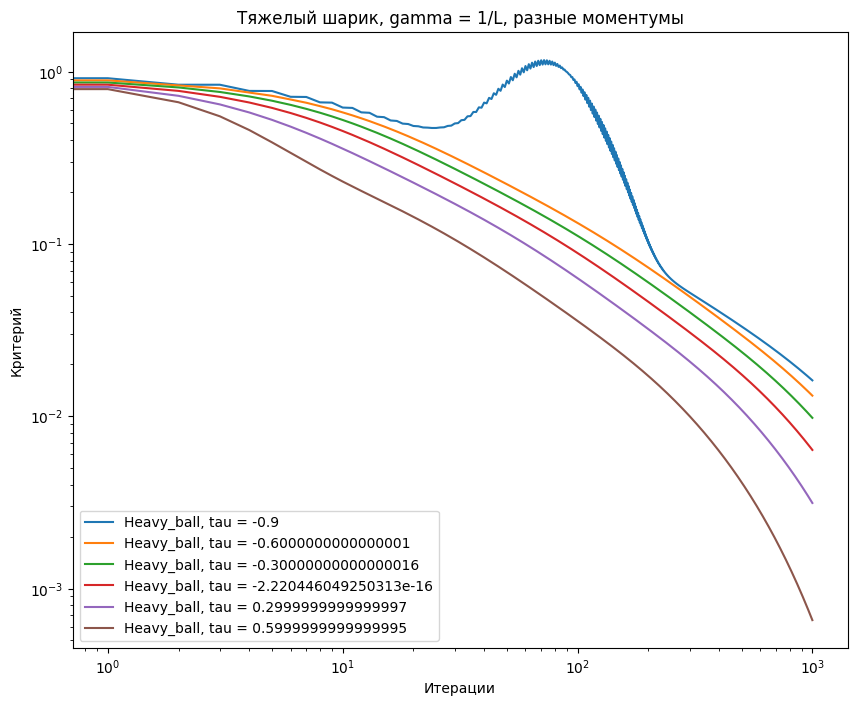

In [21]:
plot(methods_arr, name_arr , title ='Тяжелый шарик, gamma = 1/L, разные моментумы')

* Немонотонная сходимость в случае сильно отрицательных значений шага.

In [23]:

methods_arr = []
name_arr = []
for term in [1,2,3]  :
    optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , term = term)
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

    methods_arr.append(err_arr)
    name_arr.append('Heavy_ball, term = '+str(term))

100%|██████████| 1000/1000 [01:07<00:00, 14.78it/s]


In [24]:
optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = (np.sqrt(L)-np.sqrt(lambda_))/(np.sqrt(L) + np.sqrt(lambda_)))
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

methods_arr.append(err_arr)
name_arr.append(r'Heavy_ball, tau = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')

100%|██████████| 1000/1000 [01:08<00:00, 14.64it/s]


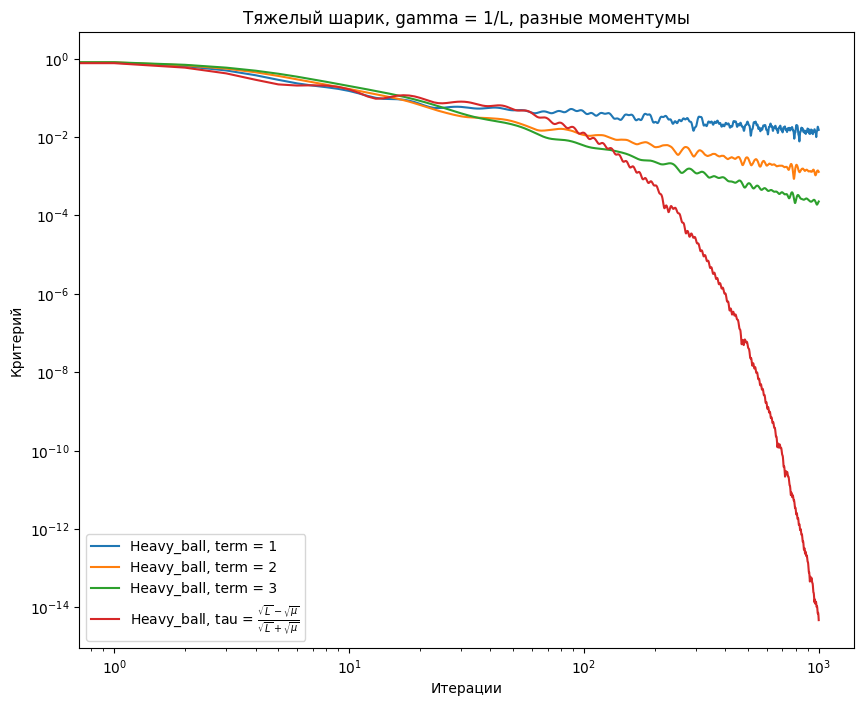

In [25]:
plot(methods_arr, name_arr , title ='Тяжелый шарик, gamma = 1/L, разные моментумы')

# НЕСТЕРОВ

In [26]:

methods_arr = []
name_arr = []
for tau in np.arange(-0.9,0.9,0.3) :
    optimizer = Nesterov(f = f , nabla_f = nabla_f , gamma=gamma_k , tau=tau)
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

    methods_arr.append(err_arr)
    name_arr.append('Nesterov, tau = '+str(tau))

100%|██████████| 1000/1000 [01:10<00:00, 14.21it/s]


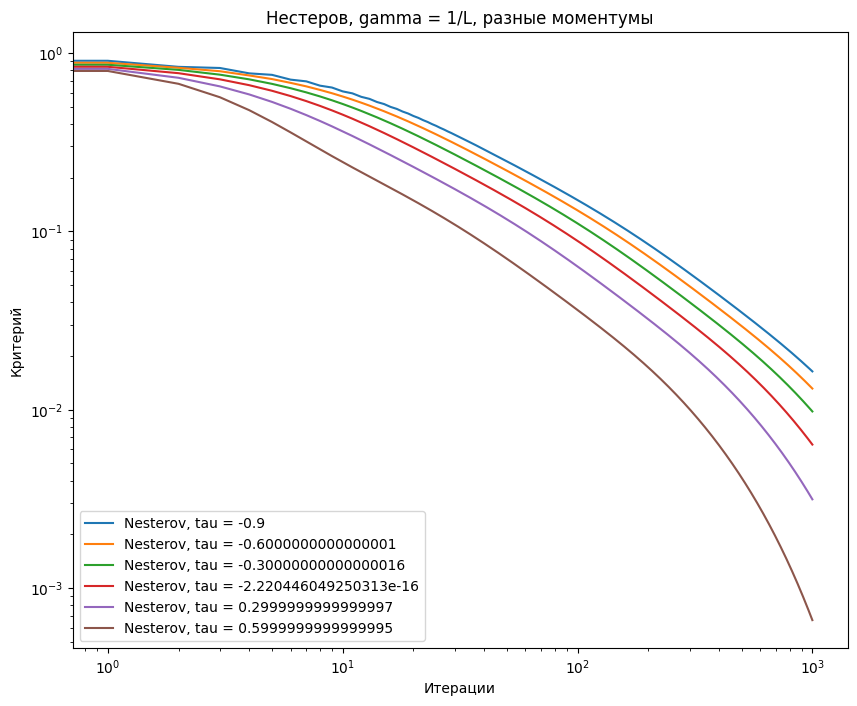

In [27]:
plot(methods_arr, name_arr , title ='Нестеров, gamma = 1/L, разные моментумы')

In [28]:

methods_arr = []
name_arr = []
for term in [1,2,3] :
    optimizer = Nesterov(f = f , nabla_f = nabla_f , gamma=gamma_k , term = term)
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

    methods_arr.append(err_arr)
    name_arr.append('Nesterov, term = '+str(term))

100%|██████████| 1000/1000 [00:45<00:00, 21.79it/s]


In [29]:
optimizer = Nesterov(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = (np.sqrt(L)-np.sqrt(lambda_))/(np.sqrt(L) + np.sqrt(lambda_)))
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

methods_arr.append(err_arr)
name_arr.append(r'Nesterov, tau = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')

100%|██████████| 1000/1000 [00:49<00:00, 20.05it/s]


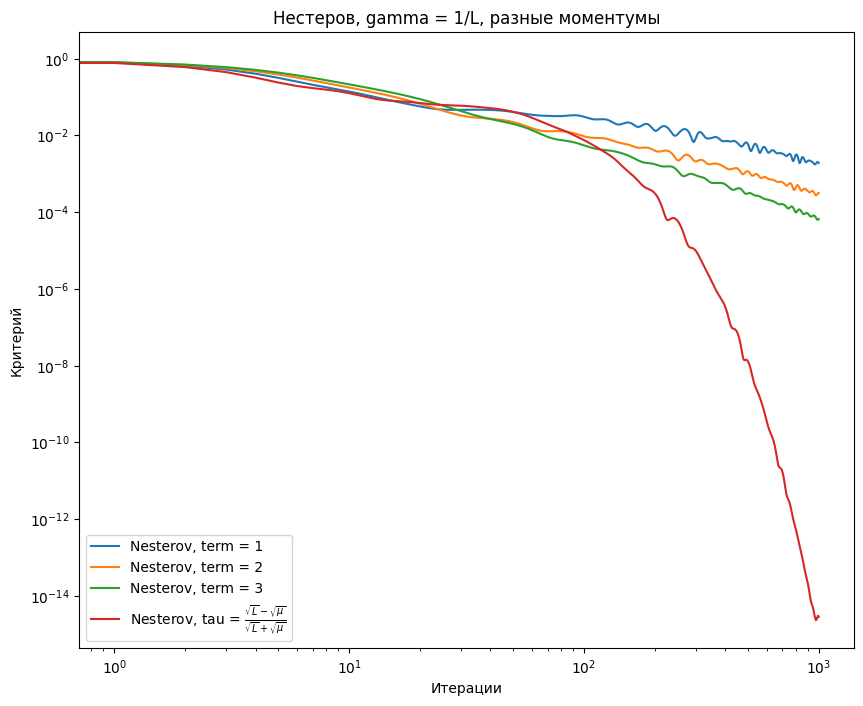

In [30]:
plot(methods_arr, name_arr , title ='Нестеров, gamma = 1/L, разные моментумы')

* Можно заметить, что у Нестерова более сглаженная кривая сходимости, чем у тяжелого шарика

## Сранвение лучшего тяжелого шарика с лучшим Нестеровым

In [32]:
methods_arr = []
name_arr = []
optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = (np.sqrt(L)-np.sqrt(lambda_))/(np.sqrt(L) + np.sqrt(lambda_)))
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

methods_arr.append(err_arr)
name_arr.append(r'Heavy_ball, tau = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')

optimizer = Nesterov(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = (np.sqrt(L)-np.sqrt(lambda_))/(np.sqrt(L) + np.sqrt(lambda_)))
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None)

methods_arr.append(err_arr)
name_arr.append(r'Nesterov, tau = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')

100%|██████████| 1000/1000 [01:07<00:00, 14.82it/s]


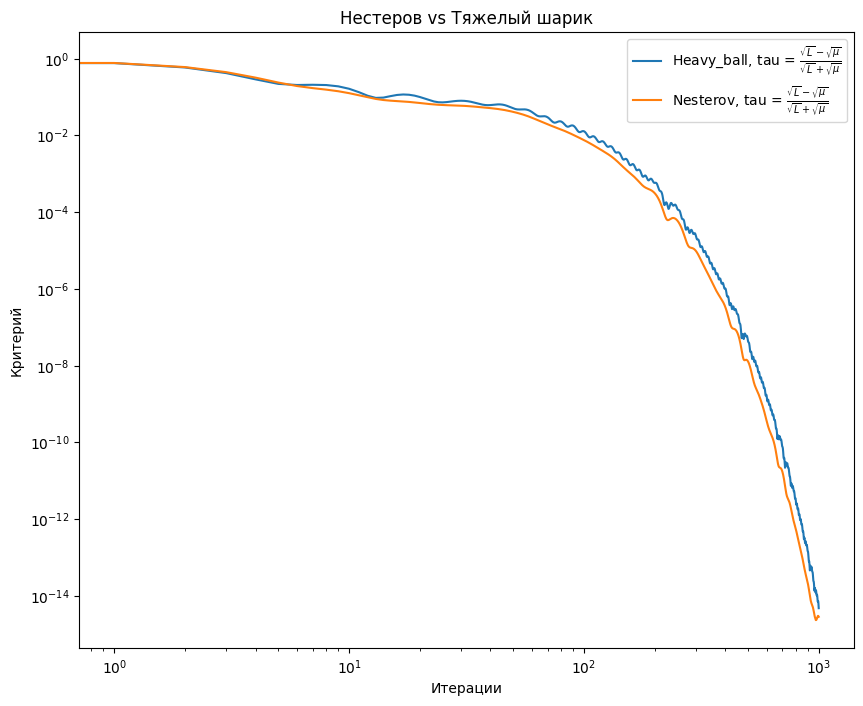

In [33]:
plot(methods_arr, name_arr , title ='Нестеров vs Тяжелый шарик')

* Сходимости совпадают, ведь методы оба являются оптимальными для задачи L гладкой и $\mu$ выпуклой

__Задача 3. (всего 40 + 30 баллов)__ Теперь поговорим про метод Ньютона и квазиньютоновские методы.

__а). (20 баллов)__ Для задачи регресии реализуйте классический метод Ньютона и запустите его. Сходится ли он? Если нет, то попробуйте перед использованием метода Ньютона сначала запускать метод градиентного спуска на несколько итераций. Варьируйте количество шагов градиентного спуска. Постройте график значения критерия сходимости от номера итерации для комбинации градиентного спуска и метода Ньютона с различным числом шагов градиентного спуска. Сделайте вывод.

In [34]:
#ваше решение (Code и Markdown)

class Newton:
    def __init__(self, f , nabla_f , gessian , gamma) :
        self.iter = 0
        self.gamma = gamma
        self.func = f
        self.nabla = nabla_f
        self.gessian = gessian
    def step(self , x , x_last) :
        self.iter += 1
        return x - self.gamma * np.linalg.inv(self.gessian(x))@self.nabla(x)


In [36]:
methods_arr = []
name_arr = []

for count_GD in np.arange(10,100,20) :
    optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
    x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = count_GD, eps=None)

    optimizer = Newton(f = f , nabla_f = nabla_f , gessian=gessian_f, gamma=gamma_k )
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None)

    methods_arr.append(err_arr_GD + err_arr)
    name_arr.append('Newton after GD with GD count step: ' + str(count_GD))


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


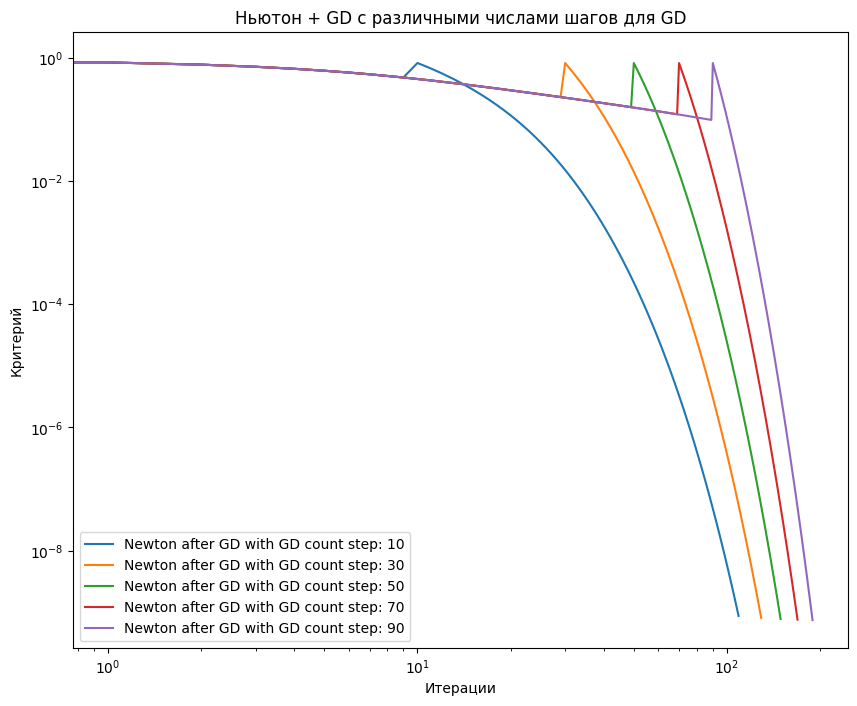

In [37]:
plot(methods_arr, name_arr , title ='Ньютон + GD с различными числами шагов для GD')

## Выводы:
* Видимо, я сразу взял хорошее приближение, так как метод Ньютона сходился сразу, без помощи GD. Поэтому и GD не имел особого вклада в сходимость совокупности моделей Ньютона и GD.
* попробуем поиграться с начальным приближением:

## Ньютон + GD,но взяли рандомное начальное приближение

In [39]:
methods_arr = []
name_arr = []

x_rand = np.random.normal(10,2,size = x_0.shape)

for count_GD in np.arange(10,100,40) :
    optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
    x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_rand, optimizer = optimizer ,K = count_GD, eps=None)

    optimizer = Newton(f = f , nabla_f = nabla_f , gessian=gessian_f, gamma=gamma_k )
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None)

    methods_arr.append(err_arr_GD + err_arr)
    name_arr.append('Newton after GD with GD count step: ' + str(count_GD))


100%|██████████| 100/100 [01:50<00:00,  1.10s/it]


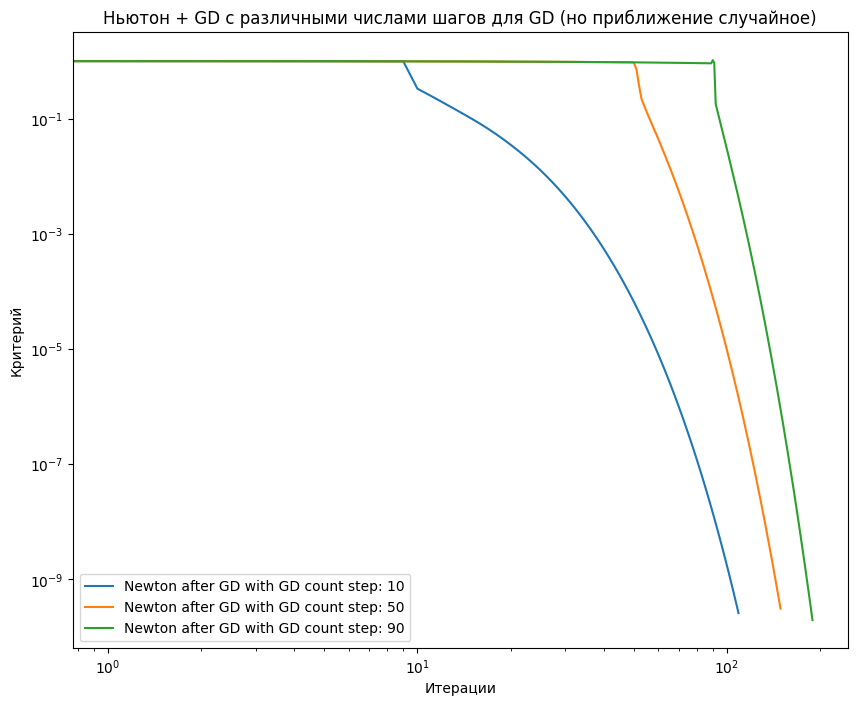

In [40]:
plot(methods_arr, name_arr , title ='Ньютон + GD с различными числами шагов для GD (но приближение случайное)')

* поведение ньютона немного изменилось,но не сильно отличется от предыдущих графиков

__б). (20 + 30 баллов)__ Для данной задачи реализуйте квазиньютоновский метод BFGS (можно реализовать более продвинутую версию L-BFGS, посмотрев оригинальную [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf) или лучше параграф 9.1 [книги](https://www.ime.unicamp.br/~pulino/MT404/TextosOnline/NocedalJ.pdf)). За реализацию L-BFGS и объяснение, как это сделать правильно и вычислительно эффективно можно получить еще __30 баллов__. Используйте метод(ы) для решения задачи регресии. Добавьте его(их) на график из предыдущего пункта. Сделайте вывод.

## BFGS

* Хотим в методе Ньютона оценивать обратную матрицу Гессиана
* Каждая итерация: поиск $H$ : $\nabla f(x) - \nabla f(y) = H(x - y)$

* Шаг Ньютона : $H_k\nabla f(x^k)$
* Можно настраиваться на искомую матрицу $H_{k+1}$  -- динамически, используя предыдущую $H_{k}$ за счет решения СЛУ.
* $s = x^{k+1} - x^k$ и $y = \nabla f(x^{k+1}) - \nabla f(x^k)$
* $\rho = \frac{1}{s^Ty}$
* $H_{k+1} = (I - \rho ys^T)H_k(I-\rho sy^T) + \rho ss^T$

In [41]:
from scipy.optimize import minimize_scalar

In [42]:
#ваше решение (Code и Markdown)

class BFGS:
    def __init__(self, f , nabla_f , gessian ) :
        self.iter = 0
        self.func = f
        self.nabla = nabla_f
        self.gessian = gessian

        self.H = None
        self.I = None
    def step(self , x , x_last) :
        if self.iter == 0 :            #Начальное приближение
            self.H = np.linalg.inv(self.gessian(x))
            self.I = np.diag(np.ones(self.H.shape[0]))

        self.iter += 1

        grad_k = self.nabla(x)
        p_k = - self.H@grad_k

        alpha = minimize_scalar( lambda alpha : self.func(x + alpha * p_k) , bounds = (0.0,1.0) , tol = 1e-12 ).x
        new_x = x + alpha * p_k

        s = new_x - x
        y = self.nabla(new_x) - grad_k

        ro = 1.0/np.dot(y, s)
        A1 = self.I - ro * s*y.T
        A2 = self.I - ro * y*s.T
        self.H = A1@self.H@A2 + ro * s*s.T

        return new_x

  0%|          | 0/100 [00:00<?, ?it/s]/home/igoreshka/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
100%|██████████| 100/100 [00:17<00:00,  5.75it/s]


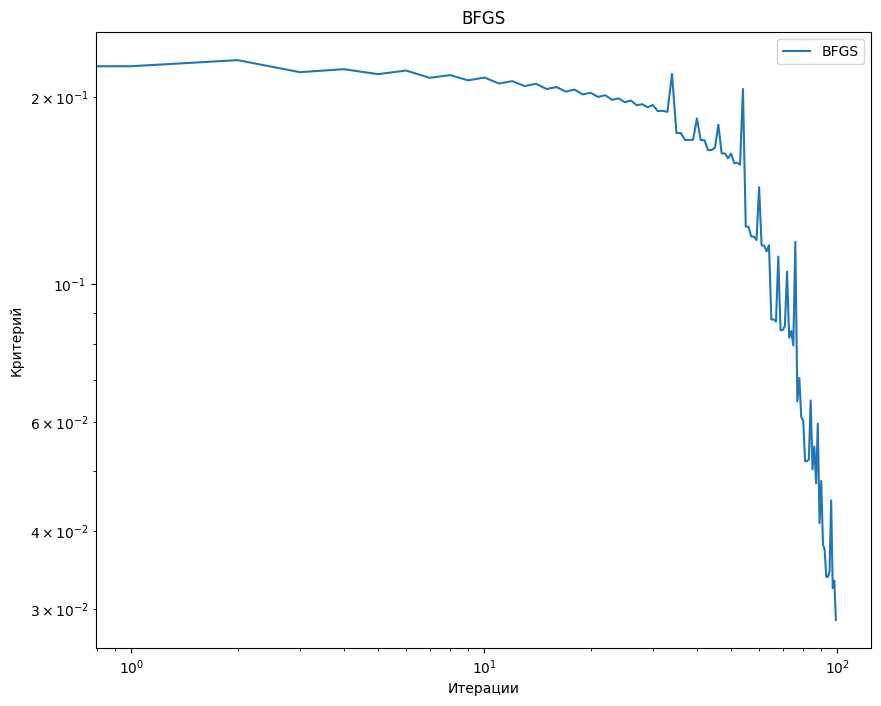

In [43]:
methods_arr = []
name_arr = []

optimizer = BFGS(f = f , nabla_f = nabla_f , gessian=gessian_f )
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_0, optimizer = optimizer ,K = 100, eps=None)

methods_arr.append(err_arr)
name_arr.append('BFGS')

plot(methods_arr, name_arr , title ='BFGS')

* При нашей заданной точке старта BFGS сходится, но медленно. Зато Итерации в 10 раз ыстрее чем у Ньютона.

## Проверим зависимсоть сходимости BFGS от точки старта

In [44]:
methods_arr = []
name_arr = []

for j in range(4) :
  x_start = np.random.normal(j , 0.5 , size = x_0.shape)
  optimizer = BFGS(f = f , nabla_f = nabla_f , gessian=gessian_f )
  x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_start, optimizer = optimizer ,K = 100, eps=None)

  methods_arr.append(err_arr)
  name_arr.append('BFGS')



100%|██████████| 100/100 [00:18<00:00,  5.34it/s]


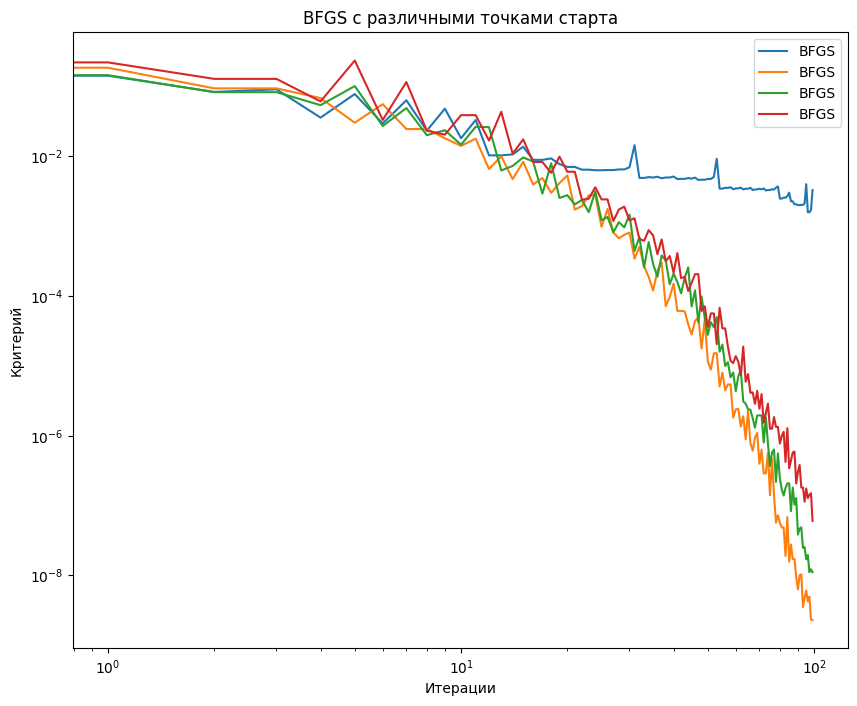

In [45]:
plot(methods_arr, name_arr , title ='BFGS с различными точками старта')

* Видимо , есть точки в которых BFGS может залипать и плохо сходиться

## Сравнение BFGS с Ньютоном

In [46]:
methods_arr = []
name_arr = []


optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 100, eps=None)

optimizer = BFGS(f = f , nabla_f = nabla_f , gessian=gessian_f )
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None)
methods_arr.append(err_arr)
name_arr.append('BFGS')

optimizer = Newton(f = f , nabla_f = nabla_f , gessian=gessian_f, gamma=gamma_k )
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None)
methods_arr.append(err_arr)
name_arr.append('Newton')


100%|██████████| 100/100 [02:21<00:00,  1.41s/it]


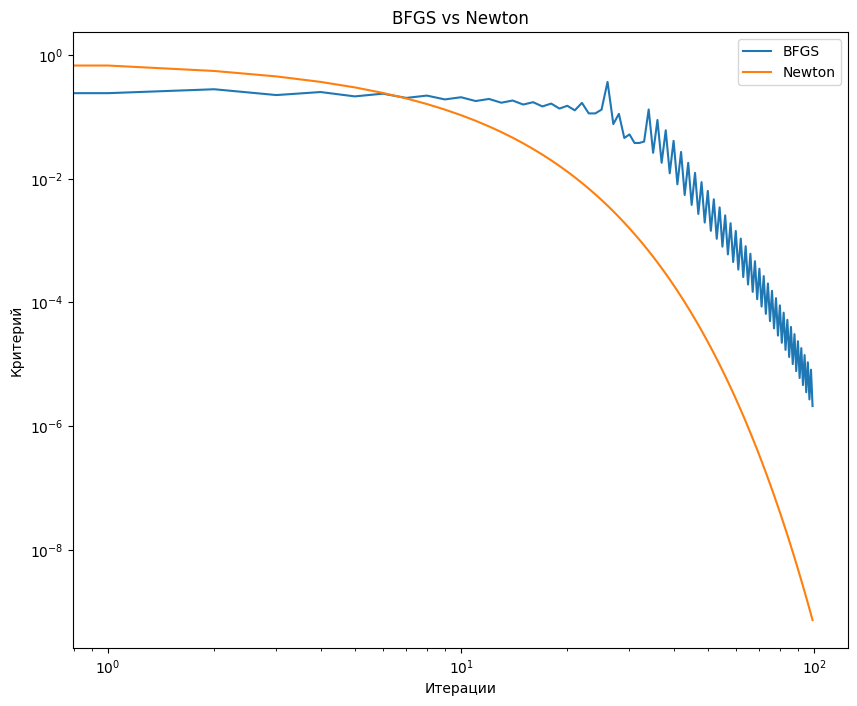

In [47]:
plot(methods_arr, name_arr , title ='BFGS vs Newton')

* У BFGS замечается определенное скачкообразное движение
* BFGS - аппроксимация метода Ньютона, поэтому сходится медленнее(по итерациям)
* однако BFGS лучше Ньютона в данной задаче, так как каждая итерация Ньютона на порядок медленнее чем у BFGS

## Зависимость сходимости BFGS от числа шагов GD

In [48]:
methods_arr = []
name_arr = []

for count_GD in np.arange(10,100,20) :
    optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
    x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = count_GD, eps=None)

    optimizer = BFGS(f = f , nabla_f = nabla_f , gessian=gessian_f )
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None)

    methods_arr.append(err_arr_GD + err_arr)
    name_arr.append('BFGS after GD with GD count step: ' + str(count_GD))


100%|██████████| 100/100 [00:21<00:00,  4.55it/s]


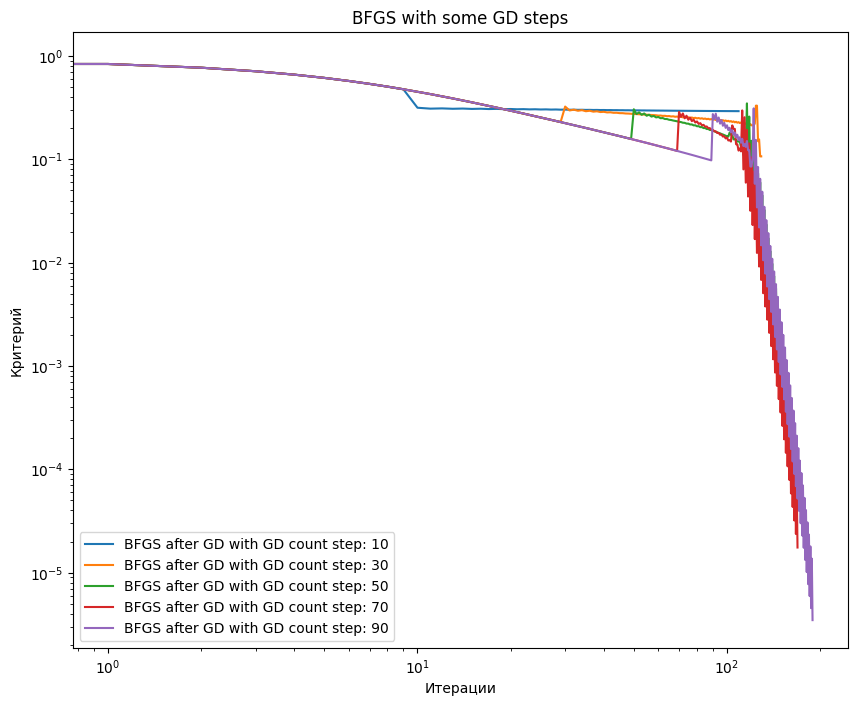

In [52]:
plot(methods_arr, name_arr , title ='BFGS with some GD steps')

* Для BFGS лучше бать порядка 70 GD шагов, чтобы он сходился (так как на 10 и 30, 50GD шагах он плохо сошелся)

## L-BFGS

* Цель аппроксимировать матрицу Гесса.
* Вместо хранения и работы с матрицей : n x n, храним и используем m векторов длины n.
* Реализация данных векторов косвенно аппроксимирует матрицу Гесса
* Используя информацию о последних m итерациях мы приближенно оцениваем кривизну функции

In [72]:
#ваше решение (Code и Markdown)

class LBFGS:
    def __init__(self, f , nabla_f , gessian , m ) :
        self.iter = 0
        self.func = f
        self.nabla = nabla_f
        self.gessian = gessian

        self.m = m
        self.s_list= []
        self.y_list = []
        self.rho_list = []
        self.H = None
        self.r = None
    def step(self , x , x_last) :
        if self.iter == 0 :
            self.H = 1
            self.r = 1
        self.iter += 1

        grad_k = self.nabla(x)
        
        if self.iter == 1 :
            p_k = -np.dot(self.H, grad_k)
        else :
            p_k = -self.r
        alpha = minimize_scalar( lambda alpha : self.func(x + alpha * p_k) , bounds = (0.0,1.0) , tol = 1e-12 ).x
        new_x = x + alpha * p_k
        new_grad = self.nabla(new_x)

        #STORAGE
        s = new_x - x
        y = new_grad - grad_k
        ro = 1.0/np.dot(y, s)
        self.s_list.append(s)
        self.y_list.append(y)
        self.rho_list.append(ro)
        if len(self.s_list) > self.m :
            self.s_list.pop(0)
            self.y_list.pop(0)
            self.rho_list.pop(0)

        q = grad_k.copy()
        alphas = []

        for si, yi, ri in zip(self.s_list[::-1], self.y_list[::-1], self.rho_list[::-1]):
            alpha_i = ri * np.dot(si, q)
            alphas.append(alpha_i)
            q -= alpha_i * yi

        r = self.H*q

        for si, yi, ri, alpha_i in zip(self.s_list, self.y_list, self.rho_list, alphas[::-1]):
            beta = ri * np.dot(yi, r)
            r += si * (alpha_i - beta)
        
        self.r = r
        self.H = np.dot(self.s_list[-1], self.y_list[-1]) / np.dot(self.y_list[-1], self.y_list[-1])

        return new_x

* Мы не храним матрицу Гесса, а также  ее нулевое приближение $H_0^k$ для k итерации.
* Храним только O(m) векторов размерности n и еще константное число векторов той же размерности.

100%|██████████| 30/30 [00:04<00:00,  6.28it/s]


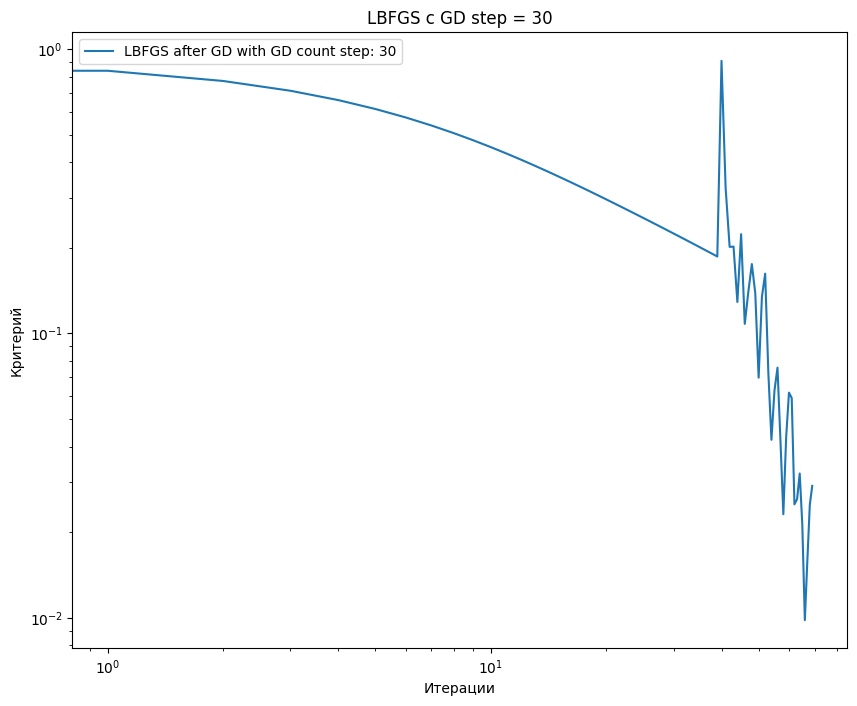

In [73]:
methods_arr = []
name_arr = []
optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 40, eps=None)
optimizer = LBFGS(f = f , nabla_f = nabla_f , gessian=gessian_f , m =2)
x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 30, eps=None)

methods_arr.append(err_arr_GD + err_arr)
name_arr.append('LBFGS after GD with GD count step: ' + str(30))

plot(methods_arr, name_arr , title ='LBFGS с GD step = 30')

## Попробуем сначала сделать пару GD шагов перед LBFGS

In [62]:
methods_arr = []
name_arr = []
for count_GD in np.arange(10,100,40) :
    optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
    x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = count_GD, eps=None)
    optimizer = LBFGS(f = f , nabla_f = nabla_f , gessian=gessian_f , m =20)
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None)

    methods_arr.append(err_arr_GD + err_arr)
    name_arr.append('LBFGS after GD with GD count step: ' + str(count_GD))


100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


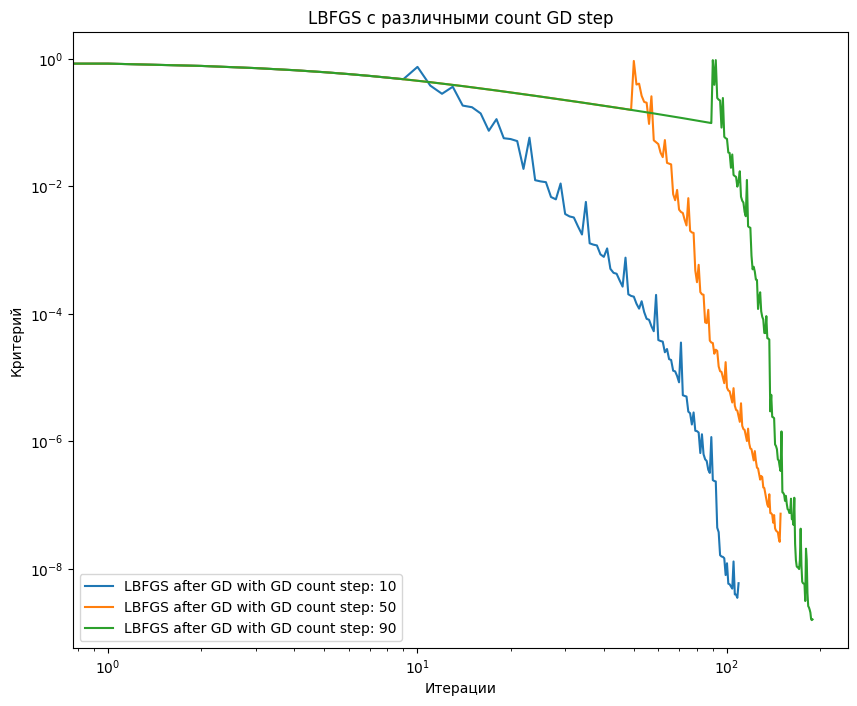

In [63]:
plot(methods_arr, name_arr , title ='LBFGS с различными count GD step')

## Проверим разные m

  0%|          | 0/30 [00:00<?, ?it/s]/home/igoreshka/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
100%|██████████| 30/30 [00:04<00:00,  6.97it/s]


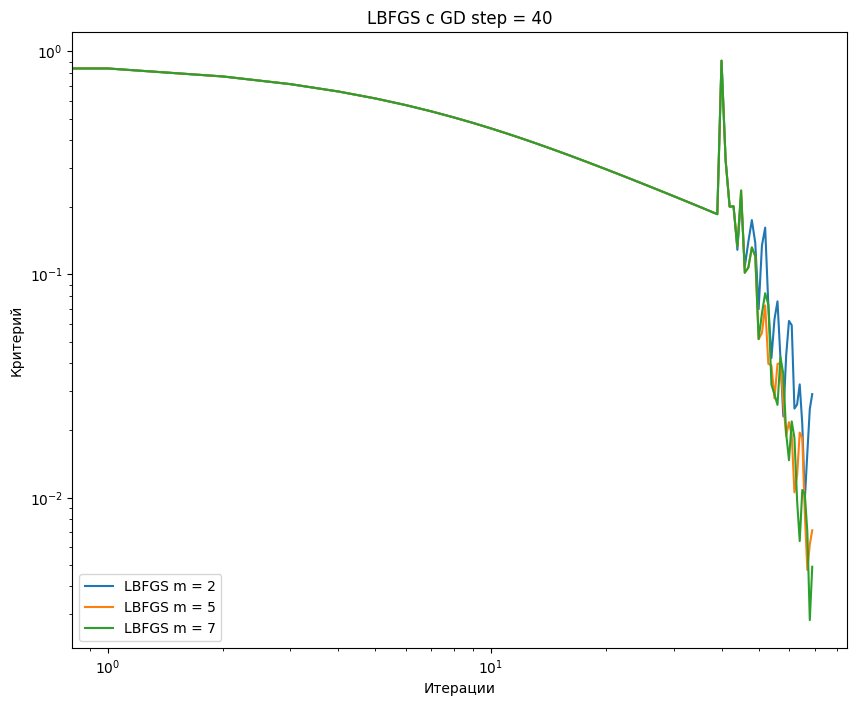

In [74]:
methods_arr = []
name_arr = []
optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 40, eps=None)
for m in [2,5,7]:
    optimizer = LBFGS(f = f , nabla_f = nabla_f , gessian=gessian_f , m =m)
    x_result, err_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 30, eps=None)
    methods_arr.append(err_arr_GD + err_arr)
    name_arr.append('LBFGS m = ' + str(m))

plot(methods_arr, name_arr , title ='LBFGS с GD step = 40')

* Можно заметить что сходимость немного улучшается при увеличении числа последних направлений шага и градиентов
* в 4 задаче используем 20 последних направлений

__Задача 4. (20 баллов)__ Осталось объеденить результаты полученные в Задачах 1-3. Для этого вспомним, что исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $g$ можно предсказывать значения меток $y$. Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке $X_{test}$. Сравните с реальными метками $y_{test}$. Количество правильно угаданных меток есть точность/accuracy модели. Сравните метод градиентного спуска, метод тяжелого шарика, ускоренный градиентный метод, метод Ньютона, BFGS(L-BFGS). Постройте два графика: значение критерия сходимости от времени работы и точность предсказания от времени работы. Сделайте вывод.

In [86]:

methods_arr = []
points_arr = []
name_arr = []
times_arr = []


# GD before Newton and BFGS and LBFGS
optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = 0 )
x_GD, err_arr_GD = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 90, eps=None)

optimizer = HeavyBall(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = (np.sqrt(L)-np.sqrt(lambda_))/(np.sqrt(L) + np.sqrt(lambda_)))
x_result, err_arr , time_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None, time =True, all_points = True)
methods_arr.append(err_arr)
points_arr.append(x_result)
times_arr.append(time_arr)
name_arr.append(r'Heavy_ball, tau = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')


optimizer = Nesterov(f = f , nabla_f = nabla_f , gamma=gamma_k , tau = (np.sqrt(L)-np.sqrt(lambda_))/(np.sqrt(L) + np.sqrt(lambda_)))
x_result, err_arr, time_arr = trainer(f = f, nabla_f =nabla_f, x_0=x_0, optimizer = optimizer ,K = 1000, eps=None, time =True, all_points = True)
methods_arr.append(err_arr)
points_arr.append(x_result)
times_arr.append(time_arr)
name_arr.append(r'Nesterov, tau = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$')

optimizer = Newton(f = f , nabla_f = nabla_f , gessian=gessian_f, gamma=gamma_k )
x_result, err_arr, time_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None, time =True, all_points = True)
methods_arr.append(err_arr)
points_arr.append(x_result)
times_arr.append(time_arr)
name_arr.append('Newton')

optimizer = BFGS(f = f , nabla_f = nabla_f , gessian=gessian_f )
x_result, err_arr, time_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None, time =True, all_points = True)
methods_arr.append(err_arr)
points_arr.append(x_result)
times_arr.append(time_arr)
name_arr.append('BFGS')

optimizer = LBFGS(f = f , nabla_f = nabla_f , gessian=gessian_f , m = 20)
x_result, err_arr, time_arr = trainer(f = f, nabla_f =nabla_f, x_0= x_GD, optimizer = optimizer ,K = 100, eps=None, time =True, all_points = True)
methods_arr.append(err_arr)
points_arr.append(x_result)
times_arr.append(time_arr)
name_arr.append('LBFGS m = '+ str(20))



  0%|          | 0/100 [00:00<?, ?it/s]/home/igoreshka/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
100%|██████████| 100/100 [00:17<00:00,  5.58it/s]


 ## Сходимость loss от времени

In [87]:
for i  , times in enumerate(times_arr) :
    times_arr[i] = np.array(times) - times[0]

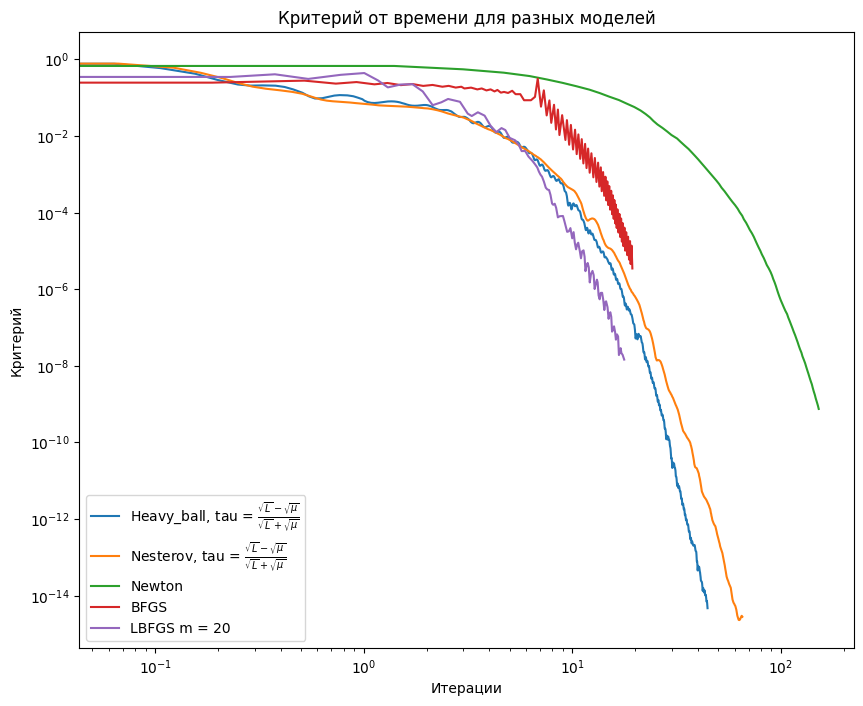

In [88]:
plot(methods_arr, name_arr , times= times_arr, title ='Критерий от времени для разных моделей')

* Можно заметить, что хоть Ньютон и сходится квадратично, но всем проигрывает по времени всем алгоритмам из-за долгого обращения гессиана

* Еще заметить можно, что тяжелый шарик обогнал по времени нестерова заметно

* Лучшим методов по loss/time можно считать тяжелый шарик

## Сходимость качества от времени

In [89]:
def criterion(w):
    y_pred = (np.exp( X_test@w) > 0.5)*2 - 1
    return sum(y_pred == y_test)/len(y_test)

In [90]:
criterions_arr = []
for points in points_arr :
    criterions_arr.append([ criterion(w) for w in points])

## Отобразим метрику (1 - precision), так как если выводить precision ,то плохо различимы качества методов на больших итерациях 

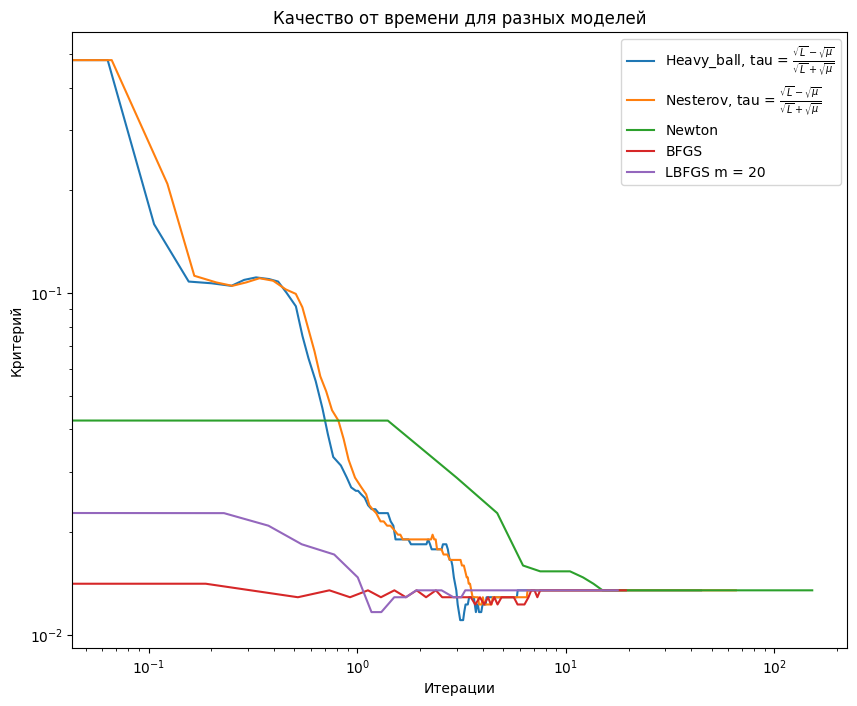

In [92]:
plot( [1 - np.array(j) for j in criterions_arr], name_arr , times= times_arr, title ='Качество от времени для разных моделей')

* BFGS,LBFGS -- топ по качество/время ,но в принципе за порядка 20 секунд все методы достигали качества метрики , соответствуюего решению оптимизационной задачи.
* Можно заметить, что иногда методы достигали лучшего качества, чем в конце эпохи. Это связано с тем, что оптимизационная задача, а то есть оптимизация лосса , хоть и влияет на оптимизацию метрики, но се равно лосс не идеально описывает метрику.